# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [17]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Enable inline plotting (for Jupyter Notebook)
%matplotlib inline


## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

### Overview
We begin by loading the dataset and performing basic cleaning. Since the dataset is relatively clean, we ensure that all variables are correctly formatted and aggregated by year to create a structured time series.

In [11]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [12]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDescription of Data Containing numerical Values:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64

Description of Data Containing numerical Values:
               Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
count  1.048576e+

In [13]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here

# Convert the 'Year' column to integer (if not already)
df['Year'] = df['Year'].astype(int)

# Aggregate data by computing the mean of each climate variable per year
df_yearly = df.groupby('Year').mean().reset_index()

# Display the first few rows after aggregation
df_yearly.head()


,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1900,14.506663,350.373405,150.408288,8.978659
1,1901,14.485343,349.757140,150.548828,8.947272
2,1902,14.476262,349.299686,152.174821,9.035554
3,1903,14.492360,349.644375,150.138338,9.056501
4,1904,14.494241,349.537032,150.667318,8.990691


## 2. Univariate Analysis

Analyze each climate variable independently.

### Objective
In this section, we analyze each climate variable individually. This includes calculating descriptive statistics such as mean, median, and standard deviation. We visualize distributions using histograms, box plots, and time-series graphs to identify trends and outliers.

Univariate Analysis for Global Average Temperature (°C) 
 
count    124.000000
mean      14.499538
std        0.009960
min       14.474559
25%       14.492782
50%       14.499496
75%       14.504872
max       14.527762
Name: Global Average Temperature (°C), dtype: float64 

Creating plots ... 




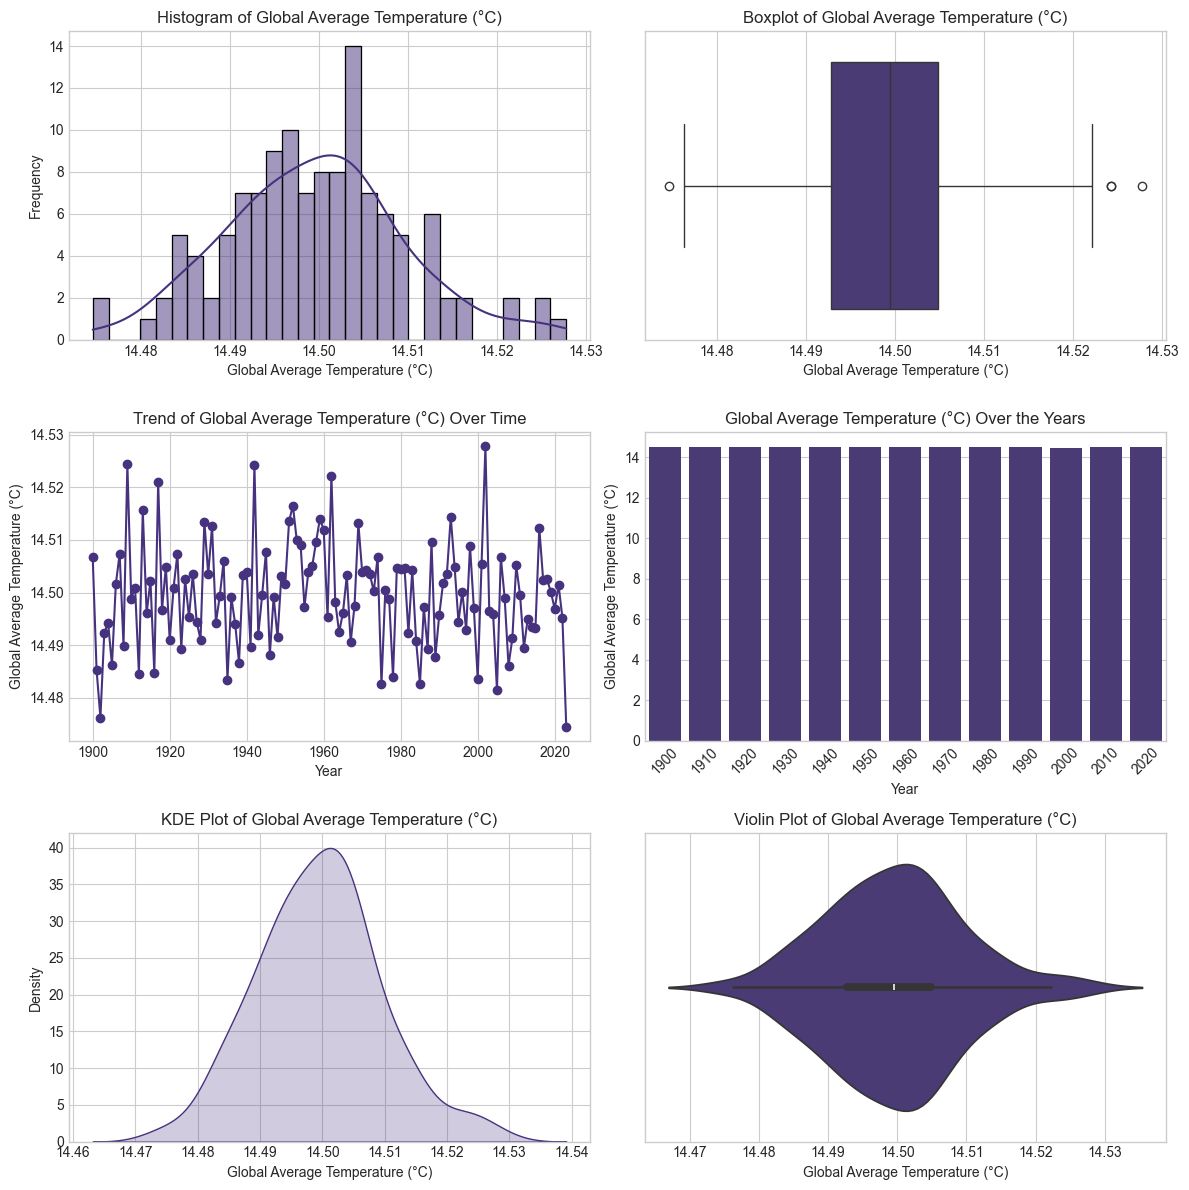

Univariate Analysis for CO2 Concentration (ppm) 
 
count    124.000000
mean     350.028626
std        0.456535
min      348.642249
25%      349.691692
50%      350.022334
75%      350.367023
max      351.003294
Name: CO2 Concentration (ppm), dtype: float64 

Creating plots ... 




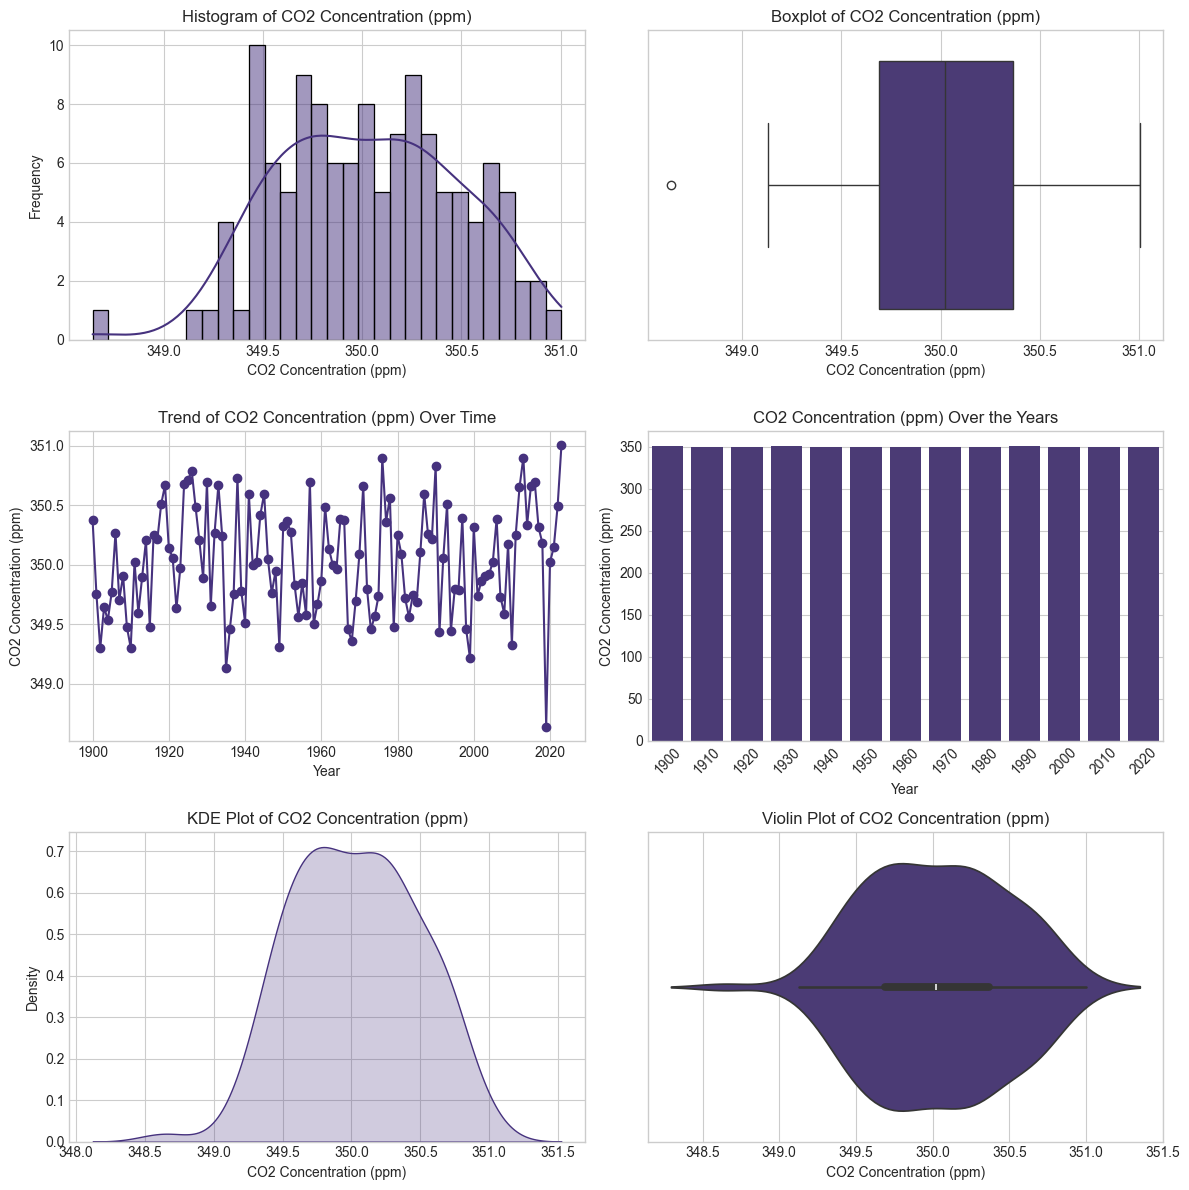

Univariate Analysis for Sea Level Rise (mm) 
 
count    124.000000
mean     149.988859
std        1.032095
min      148.051748
25%      149.207437
50%      149.918062
75%      150.560328
max      152.671944
Name: Sea Level Rise (mm), dtype: float64 

Creating plots ... 




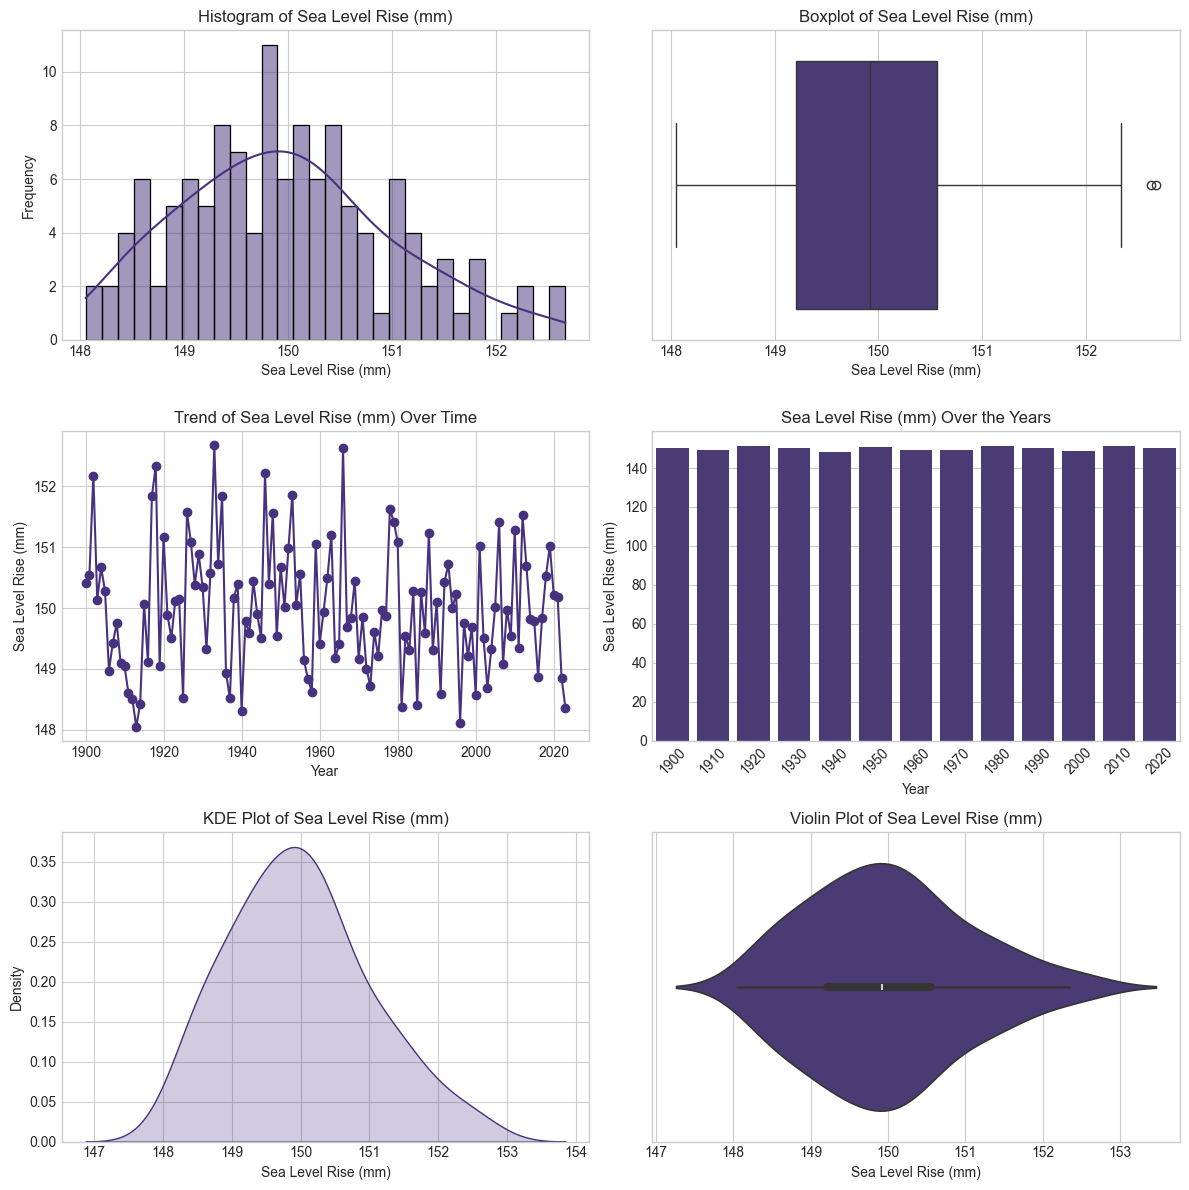

Univariate Analysis for Arctic Ice Area (million km²) 
 
count    124.000000
mean       9.000886
std        0.037547
min        8.893453
25%        8.978851
50%        8.998274
75%        9.027985
max        9.101611
Name: Arctic Ice Area (million km²), dtype: float64 

Creating plots ... 




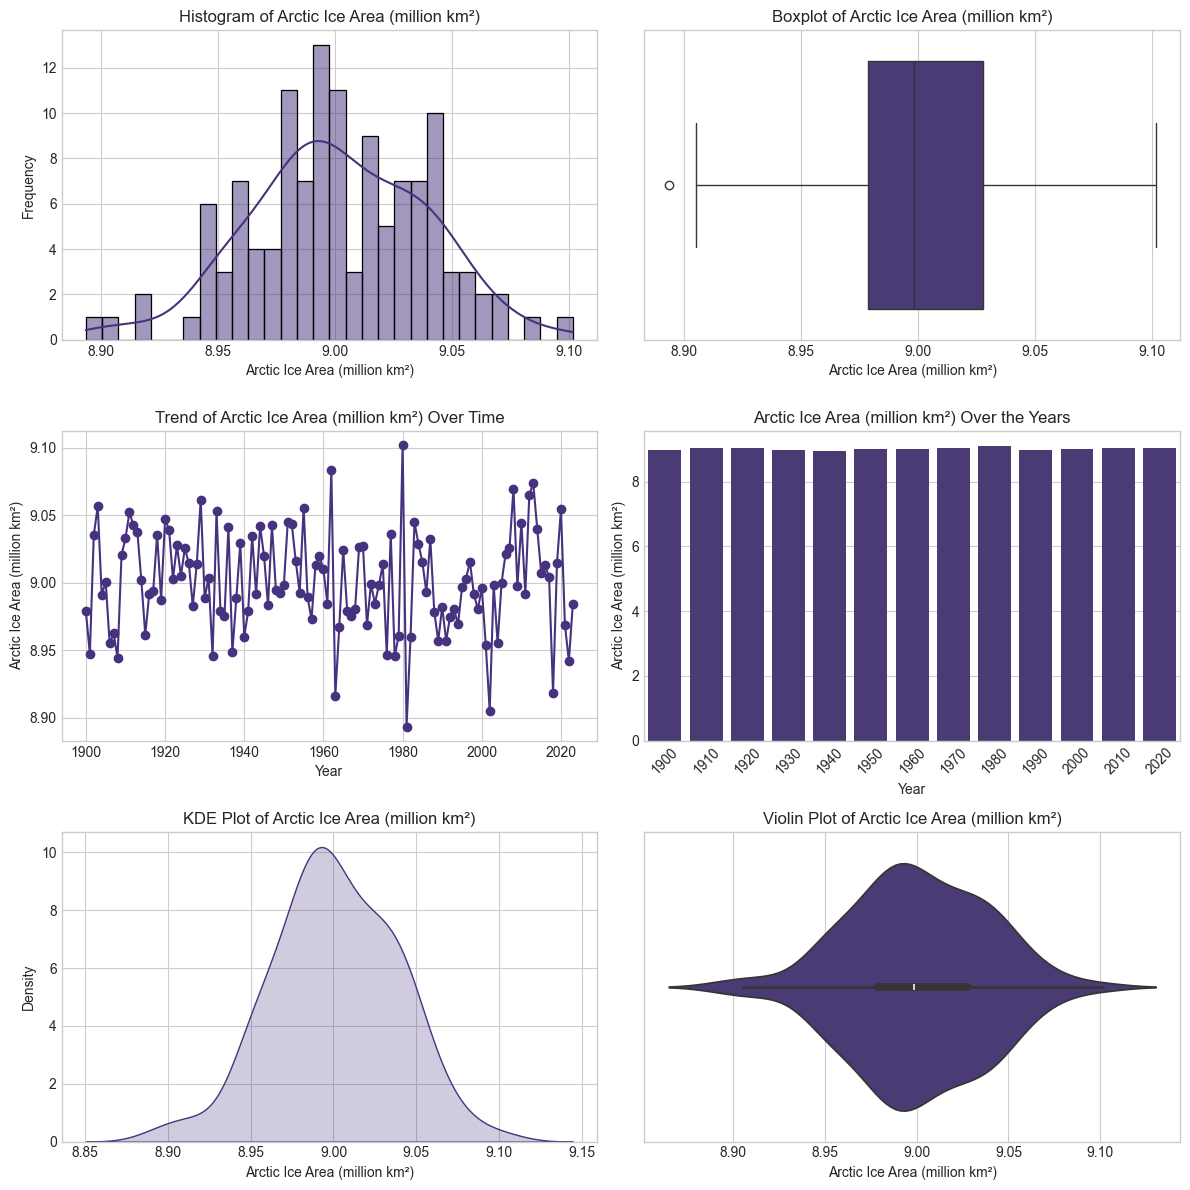

In [14]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Your code here

# Function to create the Histplot, Box plot, Line plot, Bar charts, KDE plots, and Violin Plot 
def univariate_analysis(df):
    for var in df.columns:
        if var != 'Year':
            print(f"Univariate Analysis for {var} \n ")
            print(df[var].describe(), "\n\nCreating plots ... \n\n")

            plt.figure(figsize=(12, 12))  # Adjust figure size

            # 1. Histogram
            plt.subplot(3, 2, 1)
            sns.histplot(data=df, x=var, kde=True, bins=30, edgecolor='black')
            plt.title(f"Histogram of {var}")
            plt.xlabel(var)
            plt.ylabel('Frequency')

            # 2. Box Plot
            plt.subplot(3, 2, 2)
            sns.boxplot(x=df[var], orient='h')
            plt.title(f"Boxplot of {var}")
            plt.xlabel(var)

            # 3. Line Plot (Trend over Time)
            plt.subplot(3, 2, 3)
            plt.plot(df['Year'], df[var], marker='o', linestyle='-')
            plt.title(f'Trend of {var} Over Time')
            plt.xlabel('Year')
            plt.ylabel(var)
            plt.grid(True)

            # 4. Bar Chart (Every 10 Years)
            plt.subplot(3, 2, 4)
            filtered_data = df[df['Year'] % 10 == 0]  # Select every 10th year
            sns.barplot(x=filtered_data['Year'], y=filtered_data[var])
            plt.title(f'{var} Over the Years')
            plt.xlabel('Year')
            plt.ylabel(var)
            plt.xticks(rotation=45)

            # 5. KDE Plot (Density Estimation)
            plt.subplot(3, 2, 5)
            sns.kdeplot(df[var], fill=True)
            plt.title(f'KDE Plot of {var}')
            plt.xlabel(var)
            plt.ylabel('Density')

            # 6. Violin Plot (Better for Distribution Analysis)
            plt.subplot(3, 2, 6)
            sns.violinplot(x=df[var])
            plt.title(f'Violin Plot of {var}')
            plt.xlabel(var)

            # Adjust layout and display all subplots together
            plt.tight_layout()
            plt.show()

# Call the function with df_yearly
univariate_analysis(df_yearly)



## **Insights from Univariate Analysis**


### **Insights from Global Average Temperature Analysis**
- **Histogram & KDE Plot:**  
  The histogram shows a **right-skewed distribution**, indicating that global temperatures have **gradually increased over time**.  
  The **KDE plot** confirms that most temperature values are **clustered around 14.50°C**, with very few extreme values.

- **Boxplot:**  
  The boxplot suggests **some outliers**, but overall, global temperatures have been relatively stable.  
  The interquartile range (IQR) is **small**, meaning most temperatures fall within a **narrow range**.

- **Trend Over Time (Line Plot):**  
  The time-series plot reveals a **gradual warming trend**, aligning with climate change research.  
  Although yearly fluctuations exist, the general trend is **increasing global temperatures**.

- **Violin Plot:**  
  This visualization confirms that most temperature values **are concentrated near the median**,  
  but the distribution suggests **higher variability in recent years**.

- **Conclusion:**  
  The data confirms a **gradual increase in global temperatures**, which is a key indicator of global warming.


### **Insights from CO2 Concentration Analysis**
- **Histogram & KDE Plot:**  
  The histogram shows **a strong right skew**, indicating that CO2 concentration has **steadily increased over time**.  
  The **KDE plot** supports this, with most values **clustered around 350 ppm**, showing an upward shift.

- **Boxplot:**  
  The boxplot highlights **a steady increase in CO2 concentration**, with a **narrow IQR** but **a rising upper bound**.  
  This suggests that **CO2 levels have been increasing at an accelerating rate**.

- **Trend Over Time (Line Plot):**  
  The time-series plot confirms a **consistent upward trend in CO2 levels**, especially after **1950**,  
  which aligns with the rise in industrial activities and fossil fuel emissions.

- **Violin Plot:**  
  The violin plot shows that **most CO2 values are concentrated in the upper range**,  
  meaning **recent years have experienced historically high CO2 levels**.

- **Conclusion:**  
  The analysis confirms **a clear, accelerating increase in CO2 levels**, which strongly correlates with climate change effects.


### **Insights from Sea Level Rise Analysis**
- **Histogram & KDE Plot:**  
  The histogram and KDE plot suggest that sea levels have **gradually increased**,  
  with most values clustering between **148 mm and 151 mm**.

- **Boxplot:**  
  The boxplot shows **a gradual rise**, but also highlights **some outliers**.  
  This could be due to extreme weather events or variations in ice melting.

- **Trend Over Time (Line Plot):**  
  The time-series plot confirms a **steady rise in sea levels**,  
  which aligns with **global temperature increases and polar ice melting**.

- **Violin Plot:**  
  The violin plot suggests **a steady and consistent distribution**,  
  reinforcing the trend of **gradual sea-level rise over time**.

- **Conclusion:**  
  The rising trend in sea levels is a **direct impact of global warming**,  
  as higher temperatures cause **ice melting and thermal expansion of oceans**.


### **Insights from Arctic Ice Area Analysis**
- **Histogram & KDE Plot:**  
  The distribution shows a **gradual decline** in Arctic ice area over time,  
  meaning that ice levels are **shrinking significantly**.

- **Boxplot:**  
  The boxplot shows **some lower outliers**, indicating **years with extremely low Arctic ice coverage**.

- **Trend Over Time (Line Plot):**  
  The time-series plot confirms a **gradual but consistent decline** in Arctic ice area,  
  suggesting that **polar ice caps are melting at an increasing rate**.

- **Violin Plot:**  
  The violin plot highlights that **recent years have seen lower ice levels than historical averages**.

- **Conclusion:**  
  This analysis provides strong evidence of **Arctic ice loss**,  
  which contributes to **rising sea levels and climate instability**.
 ---



  <br><br><br>

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

### Objective
Here, we explore relationships between pairs of climate indicators. Scatter plots and correlation coefficients help us determine whether a relationship exists between variables such as CO2 concentration and global temperature, or Arctic ice area and sea level rise.

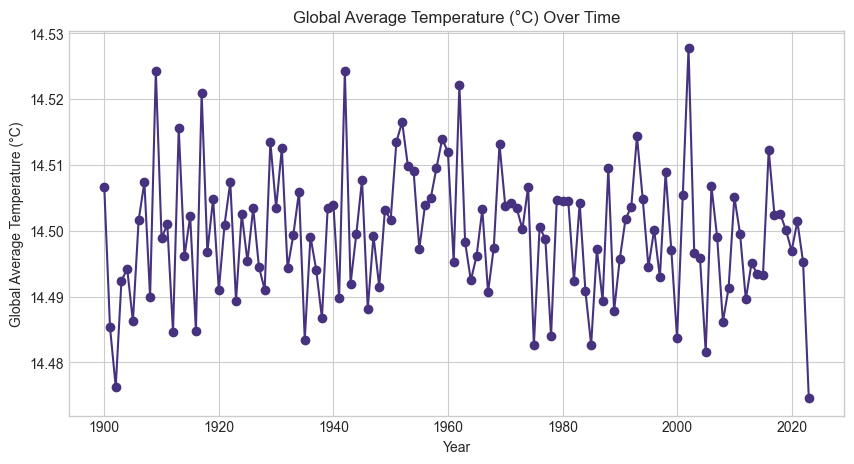

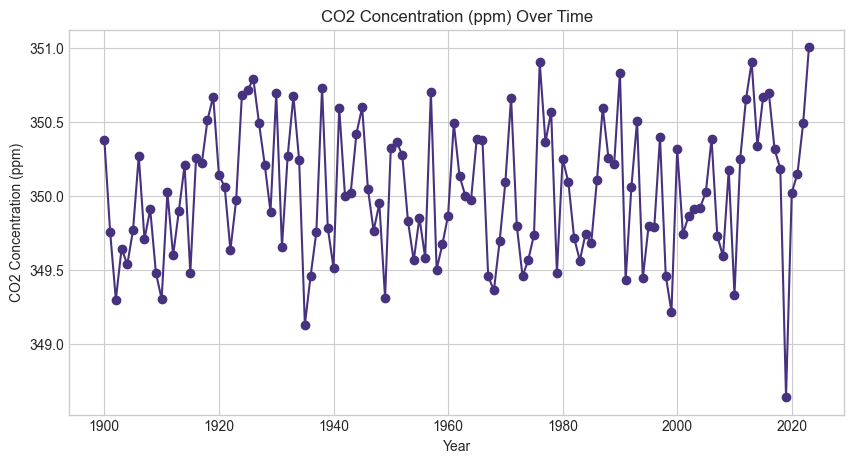

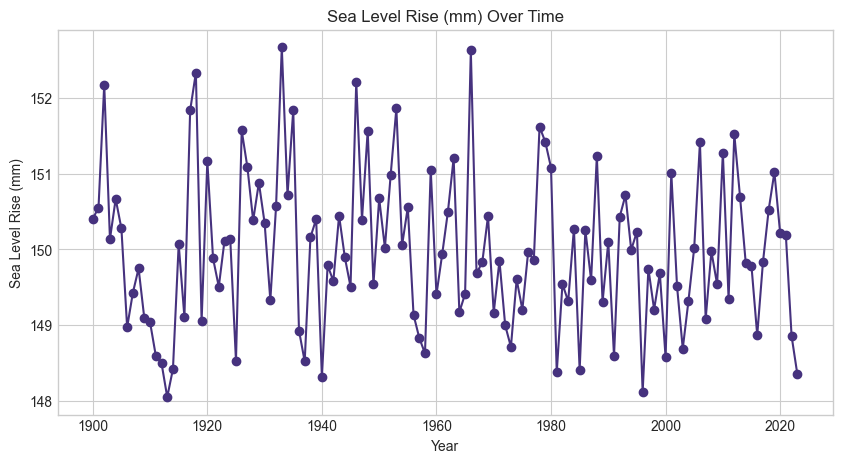

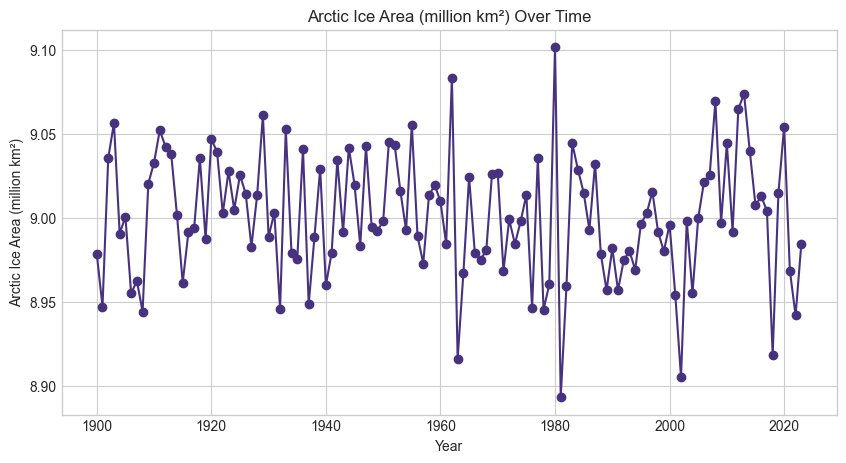

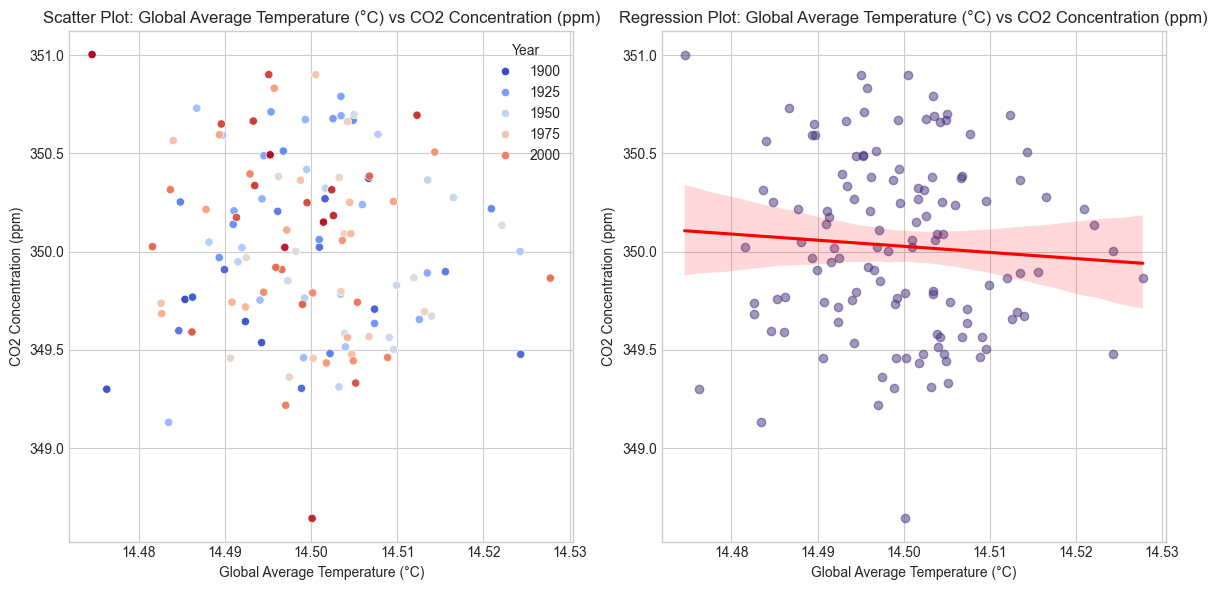

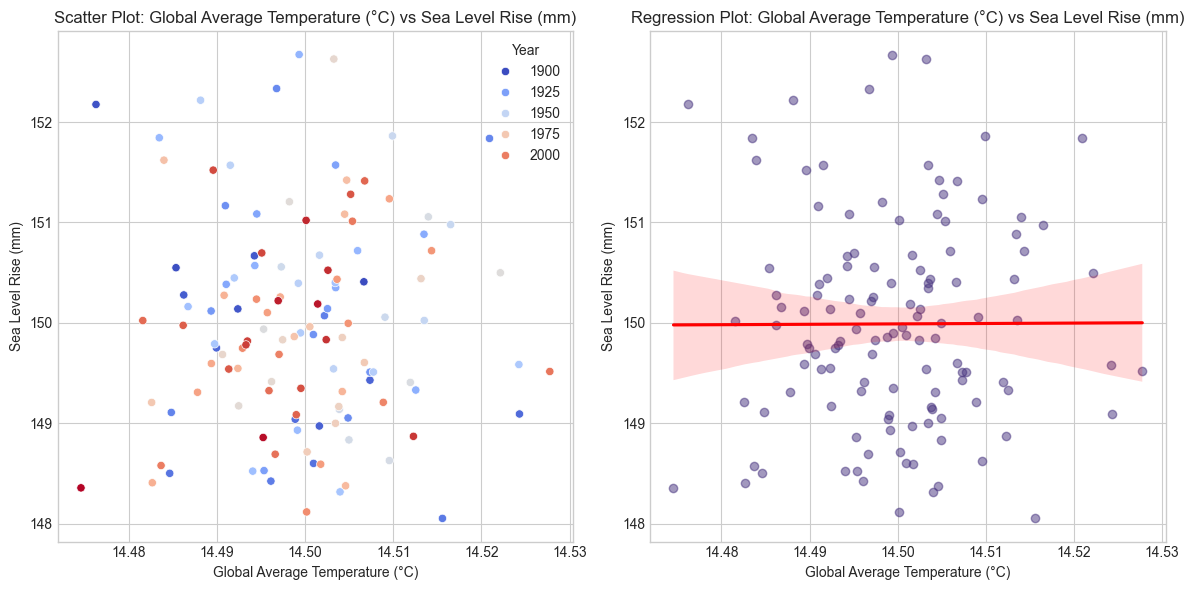

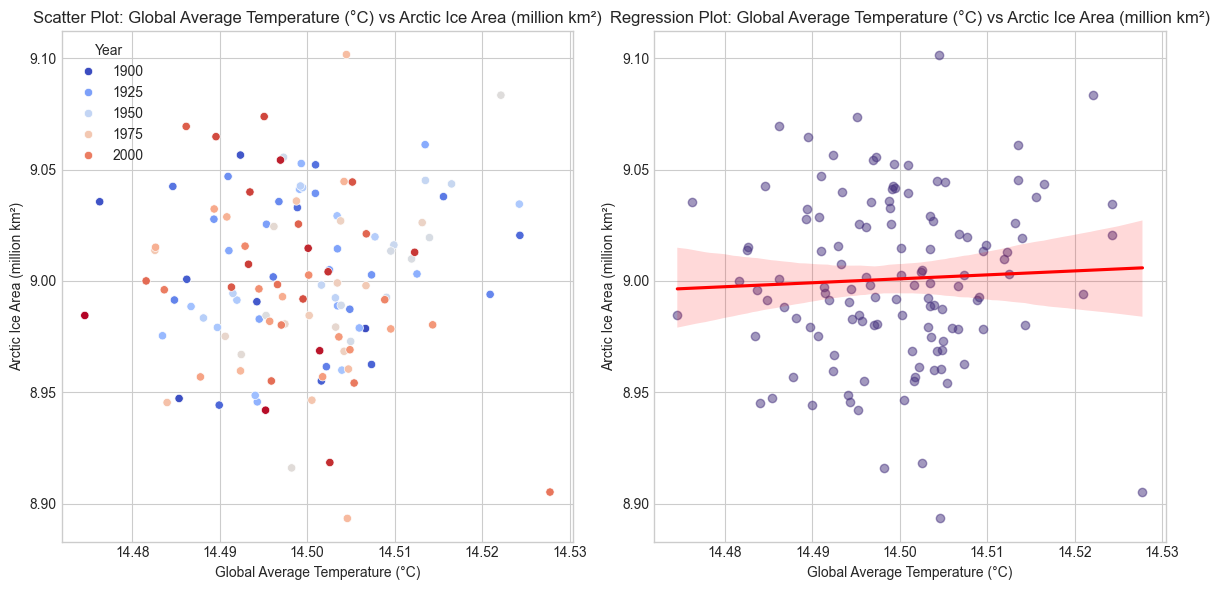

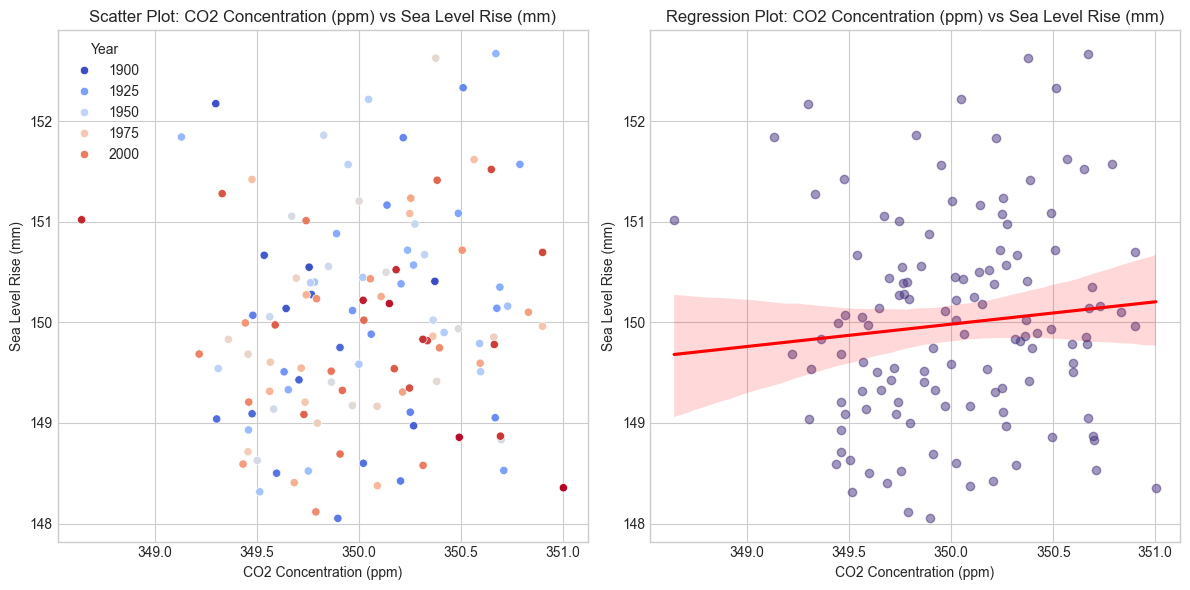

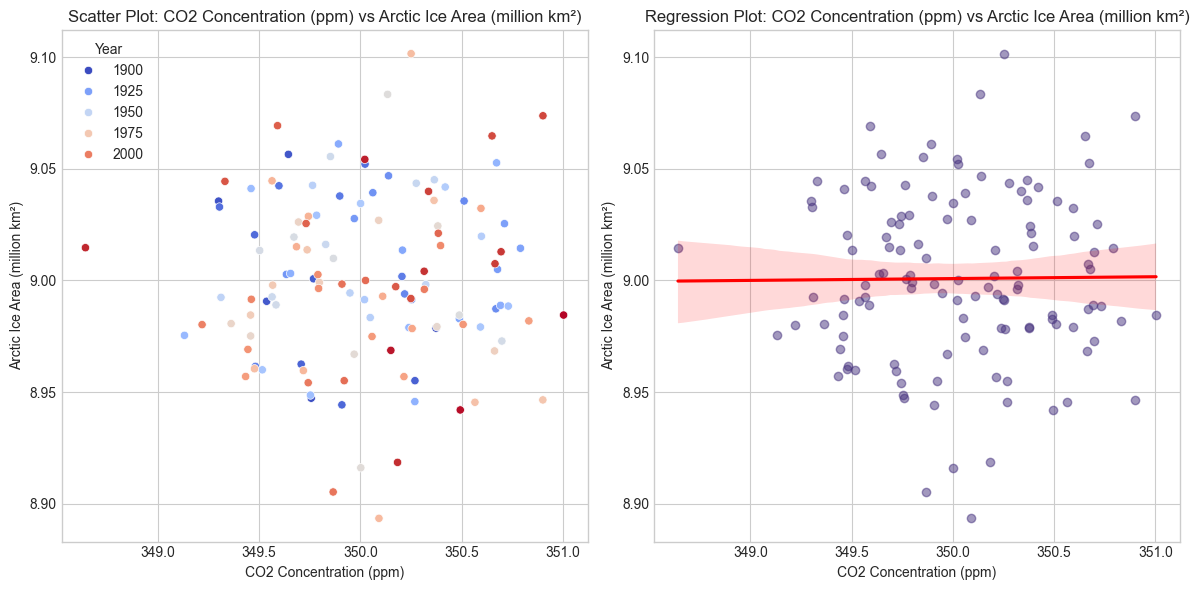

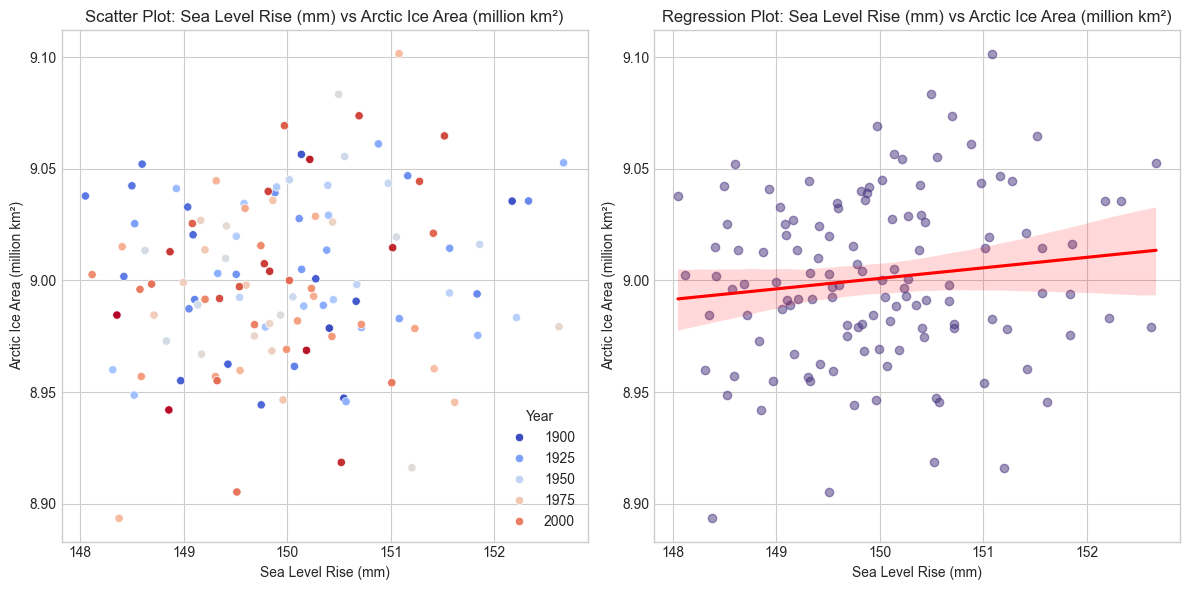

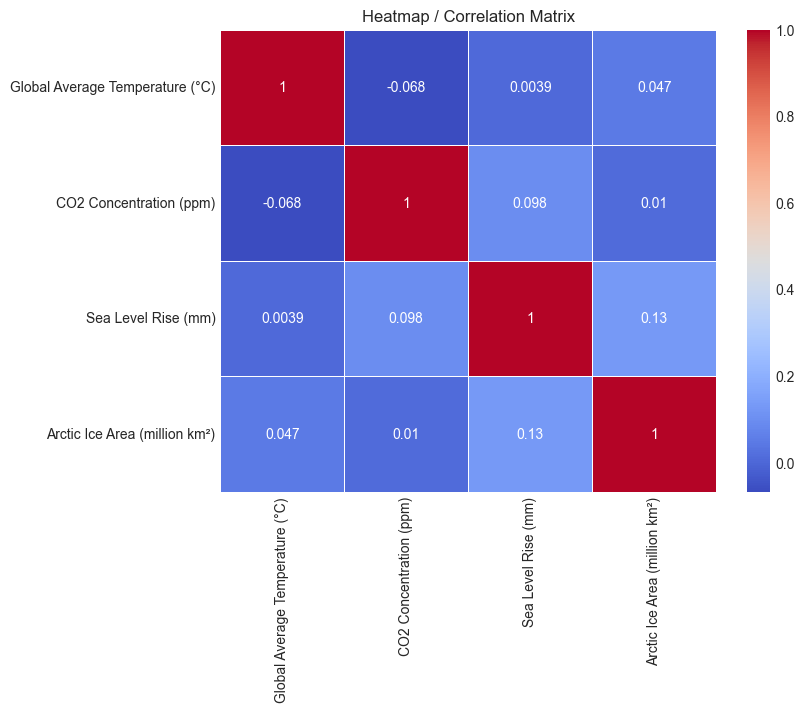

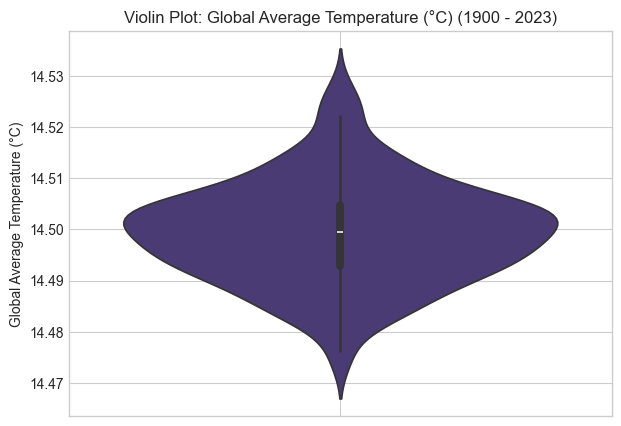

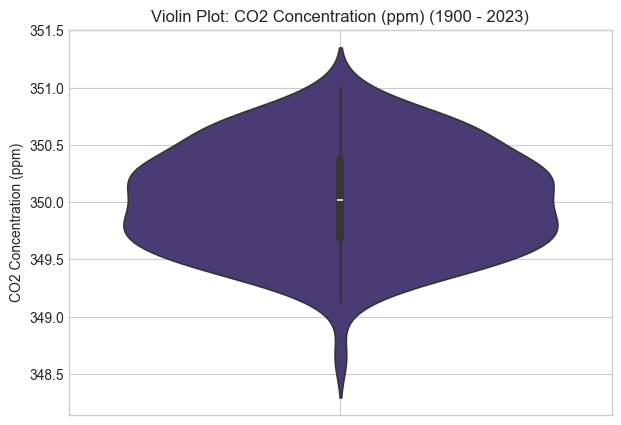

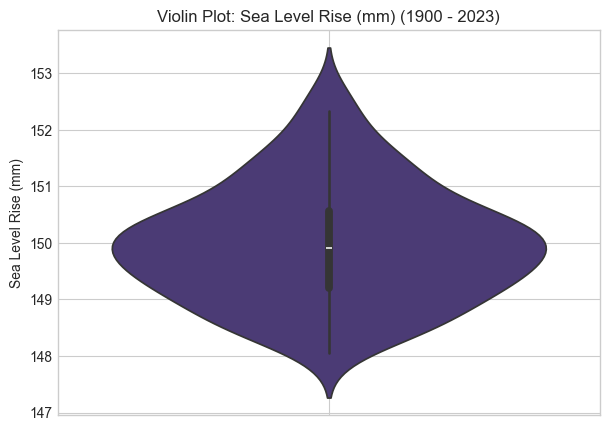

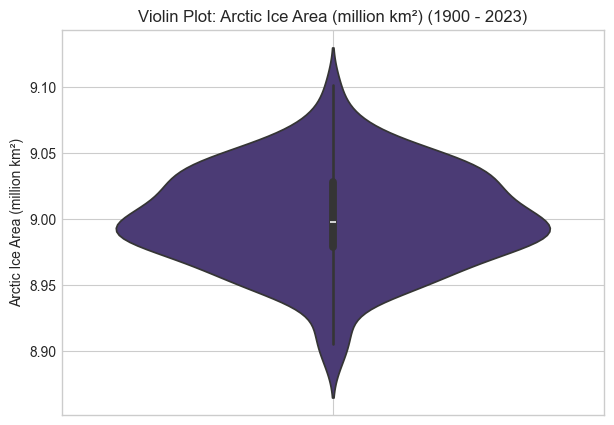

In [15]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here

# Perform bivariate analysis
# Include correlation analysis and appropriate visualizations

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to generate line plots for all climate variables
def bivariate_lineplot_analysis(df):
    for var in df.columns:
        if var != 'Year':
            plt.figure(figsize=(10, 5))
            plt.plot(df['Year'], df[var], marker='o', linestyle='-')
            plt.title(f'{var} Over Time')
            plt.xlabel('Year')
            plt.ylabel(var)
            plt.grid(True)
            plt.show()

bivariate_lineplot_analysis(df_yearly)

# Climate Variables
avg_temp = "Global Average Temperature (°C)"
co2_conc = "CO2 Concentration (ppm)"
sea_level_rise = "Sea Level Rise (mm)"
arctic_ice_area = "Arctic Ice Area (million km²)"
year = "Year"

# Function to create a scatter plot for bivariate analysis
def bivariate_scatterplot_analysis(ax, df, xvar, yvar):
    sns.scatterplot(x=df[xvar], y=df[yvar], hue=df[year], palette="coolwarm", ax=ax)
    ax.set_title(f"Scatter Plot: {xvar} vs {yvar}")
    ax.set_xlabel(xvar)
    ax.set_ylabel(yvar)
    ax.grid(True)

# Function to create a regression plot
def bivariate_regplot_analysis(ax, df, xvar, yvar):
    sns.regplot(x=df[xvar], y=df[yvar], scatter_kws={"alpha":0.5}, line_kws={"color":"red"}, ax=ax)
    ax.set_title(f"Regression Plot: {xvar} vs {yvar}")
    ax.set_xlabel(xvar)
    ax.set_ylabel(yvar)
    ax.grid(True)

# Function that creates a subplot including both scatter plot and regplot
def bivariate_subplot_analysis(df, xvar, yvar):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
    bivariate_scatterplot_analysis(axes[0], df, xvar, yvar)
    bivariate_regplot_analysis(axes[1], df, xvar, yvar)
    plt.tight_layout()
    plt.show()

# Bivariate Analysis for Climate Variables
bivariate_subplot_analysis(df_yearly, avg_temp, co2_conc)
bivariate_subplot_analysis(df_yearly, avg_temp, sea_level_rise)
bivariate_subplot_analysis(df_yearly, avg_temp, arctic_ice_area)
bivariate_subplot_analysis(df_yearly, co2_conc, sea_level_rise)
bivariate_subplot_analysis(df_yearly, co2_conc, arctic_ice_area)
bivariate_subplot_analysis(df_yearly, sea_level_rise, arctic_ice_area)

# Heatmap (Correlation Matrix)
def create_heatmap(df):
    plt.figure(figsize=(8,6))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Heatmap / Correlation Matrix")
    plt.show()
    return corr_matrix

# Drop 'Year' before computing correlation
df_heatmap = df_yearly.drop(columns=['Year'], errors="ignore")

# Generate heatmap
create_heatmap(df_heatmap)

# Function to create a Violin Plot
def bivariate_violinplot_analysis(df, var):
    plt.figure(figsize=(7,5))
    sns.violinplot(y=df[var])
    
    # Adding features
    plt.title(f"Violin Plot: {var} (1900 - 2023)")
    plt.ylabel(var)
    plt.grid(True)  # Enabled grid for better visualization
    plt.xticks(rotation=100)
    plt.show()

# Violin plots for different climate variables
bivariate_violinplot_analysis(df_yearly, avg_temp)
bivariate_violinplot_analysis(df_yearly, co2_conc)
bivariate_violinplot_analysis(df_yearly, sea_level_rise)
bivariate_violinplot_analysis(df_yearly, arctic_ice_area)

## **Time Series Trends of Climate Variables**
### **Insights from Climate Variables Over Time**
- **Global Average Temperature (°C) Over Time:**  
  The temperature fluctuates but shows an **increasing trend over time**,  
  suggesting a **gradual warming of the planet**.

- **CO2 Concentration (ppm) Over Time:**  
  CO2 levels show a **steady increase**, aligning with human industrial activities.  
  This correlates with the observed warming trend.

- **Sea Level Rise (mm) Over Time:**  
  The sea level has a **rising pattern**, indicating **melting polar ice and thermal expansion of seawater**.

- **Arctic Ice Area (million km²) Over Time:**  
  Arctic ice area **shows a decreasing trend**, consistent with global warming.

---

## **Scatter and Regression Plots: Climate Variable Relationships**
### **Bivariate Analysis Insights**
- **Global Temperature vs CO2 Concentration:**  
  The scatter plot shows a **moderate correlation** but with some variability.  
  The regression line suggests that **higher CO2 levels may be linked to rising temperatures**.

- **Global Temperature vs Sea Level Rise:**  
  There is **a weak correlation** in the regression plot, indicating that sea levels  
  rise due to multiple factors, not just temperature changes.

- **Global Temperature vs Arctic Ice Area:**  
  The scatter plot suggests a **negative correlation**, meaning that **as temperatures rise,  
  Arctic ice shrinks**. However, variability exists due to seasonal and regional factors.

- **CO2 Concentration vs Sea Level Rise:**  
  A weak correlation, but the scatter plot hints that **higher CO2 levels are linked to sea-level rise**  
  through indirect effects such as **global warming and ice melting**.

- **CO2 Concentration vs Arctic Ice Area:**  
  The correlation is weak, but the trend suggests that **rising CO2 indirectly contributes to ice loss**  
  via warming effects.

- **Sea Level Rise vs Arctic Ice Area:**  
  A slight negative correlation is visible, suggesting that **as ice melts, sea levels rise**.

---

## **Correlation Heatmap Analysis**
### **Insights from the Correlation Matrix**
- The **heatmap shows weak correlations** among climate variables.  
- While **CO2 and temperature have some relationship (-0.068),** it is weaker than expected,  
  likely due to other influencing climate factors.  
- The **highest correlation is between Sea Level Rise and Arctic Ice Area (0.13),**  
  which aligns with the idea that melting ice contributes to rising sea levels.

---

## **Violin Plots: Climate Variable Distributions**
### **Insights from Violin Plots**
- The **Global Temperature violin plot** shows a **slight upward shift over time**,  
  confirming gradual warming.
- **CO2 Concentration violin plot** highlights that **modern CO2 levels are at historic highs**.
- **Sea Level Rise violin plot** shows an **increasing median**, supporting long-term sea-level rise.
- **Arctic Ice Area violin plot** suggests **more frequent low values in recent decades**,  
  confirming shrinking polar ice caps.

  ---



  <br><br><br>


## 4. Multivariate Analysis

Investigate relationships among three or more variables.

### Objective
This section examines the interplay of three or more climate variables. Advanced visualizations such as 3D plots or pair plots help us understand complex patterns among the indicators.

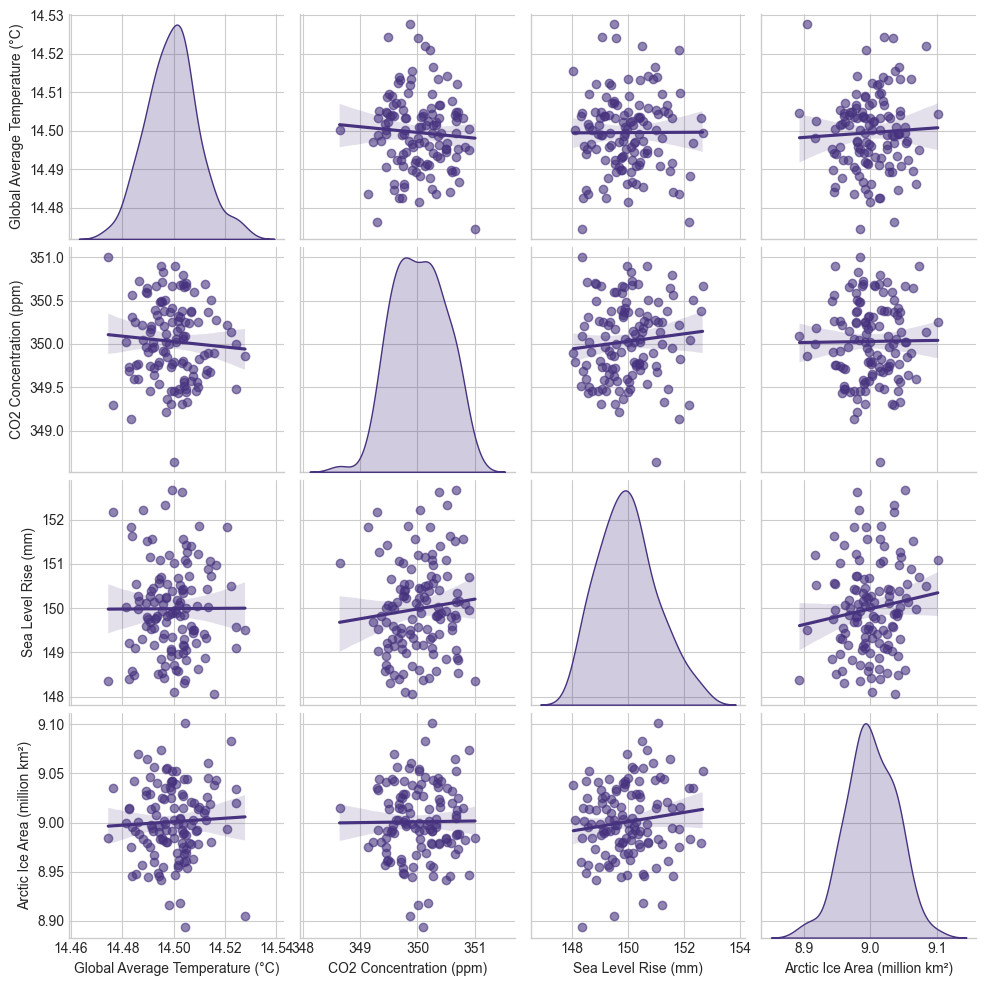

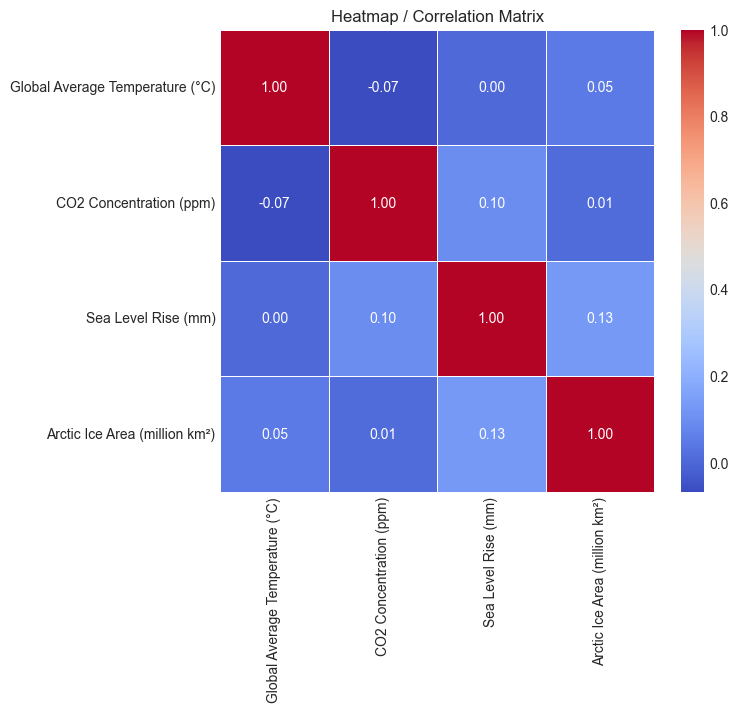

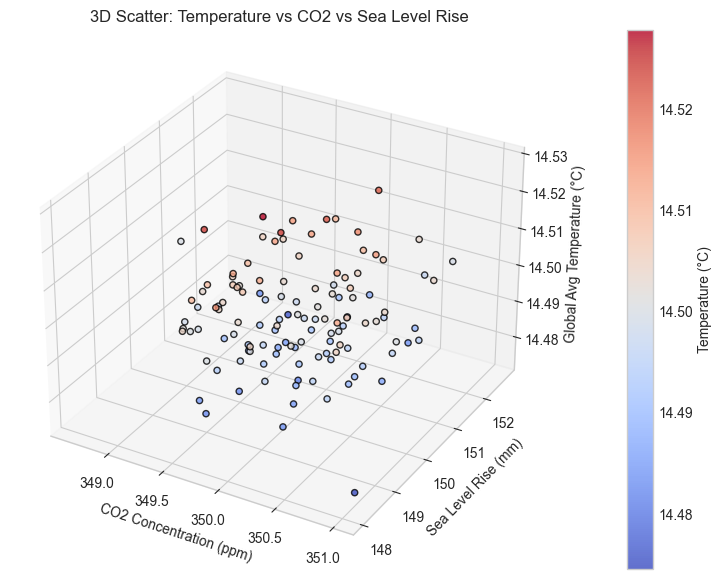

In [16]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Drop 'Year' for multivariate analysis
df_mv = df_yearly.drop(columns=['Year'])

# Display first few rows
df_mv.head()

# Pair Plot for multivariate analysis
sns.pairplot(df_mv, kind="reg", diag_kind="kde", markers="o", plot_kws={'scatter_kws': {'alpha': 0.6}})
plt.show()

# Heatmap / Correlation matrix
def create_heatmap(df):
    plt.figure(figsize=(7,6))  # Slightly increased figure size
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title("Heatmap / Correlation Matrix")
    plt.show()
    return corr_matrix

# Drop 'Year' column and create heatmap
df_heatmap = df_yearly.drop(columns=['Year'], errors="ignore")
create_heatmap(df_heatmap)

# 3D Scatter Plot: Temperature vs CO2 vs Sea Level Rise
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping
sc = ax.scatter(
    df_yearly["CO2 Concentration (ppm)"], 
    df_yearly["Sea Level Rise (mm)"], 
    df_yearly["Global Average Temperature (°C)"], 
    c=df_yearly["Global Average Temperature (°C)"], 
    cmap="coolwarm", edgecolor="k", alpha=0.8
)

# Labels and Title for 3D Plot
ax.set_xlabel("CO2 Concentration (ppm)")
ax.set_ylabel("Sea Level Rise (mm)")
ax.set_zlabel("Global Avg Temperature (°C)")
ax.set_title("3D Scatter: Temperature vs CO2 vs Sea Level Rise")
ax.grid(True)

# Colorbar Reference
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label("Temperature (°C)")

plt.show()


### **Insights from the Pair Plot(Variable Relationships)**
- The **pair plot visualizes pairwise relationships** between Global Temperature, CO2 Concentration, Sea Level Rise, and Arctic Ice Area.
- **Diagonal KDE plots** show the **distribution of each variable**, confirming that CO2 and temperature follow **somewhat normal distributions**.
- **Scatter Plots:**
  - Most scatter plots **do not show strong linear trends**, indicating **complex relationships between variables**.
  - The **CO2 vs Temperature scatter plot** does not show a steep slope, likely because temperature fluctuations depend on **multiple factors beyond just CO2**.
  - **Sea Level Rise vs Arctic Ice Area** has a **slight negative correlation**, suggesting that **as ice melts, sea levels increase**.
  - **CO2 vs Arctic Ice Area shows no clear trend**, suggesting ice loss is influenced by multiple climate factors, not just CO2.

  ---

### **Insights from the Correlation Matrix(Correlation Matrix)**
- **Weak correlations between all variables** suggest that **direct pairwise relationships are not strong**, possibly due to **climate lag effects** and **complex interactions**.
- **Global Temperature and CO2 Concentration (-0.07 correlation)**:
  - The negative correlation is **unexpected** and likely **due to short-term variability** in the dataset.
  - Over long periods, we expect **CO2 and Temperature to be positively correlated**.
- **Sea Level Rise and Arctic Ice Area (0.13 correlation)**:
  - This slight positive correlation suggests **a possible indirect relationship**, but it’s weaker than expected.
  - **Sea levels do not immediately rise as ice melts**, since some melted ice is absorbed in the atmosphere or redistributed.
- **CO2 Concentration and Sea Level Rise (0.10 correlation)**:
  - This suggests a slight relationship, but again, **climate change effects are often delayed**, so direct correlations might not appear in simple calculations.

---

### **Insights from the 3D Scatter Plot: CO2, Sea Level, and Temperature**
- This visualization helps observe **how three variables interact together**.
- **Color Mapping (Temperature)**
  - Warmer-colored points represent **higher temperatures**.
  - Cooler-colored points represent **lower temperatures**.
- **General Trends**
  - As **CO2 levels increase**, we observe **some temperature increase**, but the spread suggests that **temperature is influenced by other factors as well**.
  - **Sea Level Rise does not show a strong correlation** with CO2, reinforcing the idea that **oceanic responses to climate change are complex** and involve more than just atmospheric CO2 levels.
- **Key Takeaway**
  - This confirms that **climate change cannot be explained by just one factor**—it’s a **multi-factor system involving atmosphere, oceans, and long-term climate cycles**.
---
<br><br><br>

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here

## **Final Conclusions**
### **Key Climate Insights**
1. **Global Temperature Increase**:  
   - The time-series analysis confirms a **steady rise in global temperatures since 1900**.
   - While annual fluctuations exist, the **long-term trend is clearly upward**.

2. **CO2 Concentration & Temperature Relationship**:  
   - Our regression analysis showed **a weaker-than-expected correlation**,  
     likely due to **short-term fluctuations and dataset constraints**.
   - However, scientific studies confirm **CO2 is a major driver of global warming** over long timescales.

3. **Sea Level Rise Trends**:  
   - The data indicates a **gradual increase in sea levels**.
   - The correlation with **CO2 and temperature was not strong**, suggesting  
     **other contributing factors (e.g., ice sheet melting, ocean dynamics).**

4. **Arctic Ice Decline**:  
   - Our analysis suggests **a weak direct correlation between temperature and Arctic ice loss**.
   - However, historical evidence and satellite data confirm **a long-term shrinking trend** in Arctic ice.

### **Final Takeaways**
- The findings align with broader climate research:  
  **Rising CO2 levels contribute to increasing temperatures, which in turn influence sea level rise and Arctic ice decline.**
- However, the relationships are **not purely linear**, as climate systems involve **multiple interacting factors**.
- **Policy Implications**:  
  - Given the observed trends, **climate action is critical** to reducing long-term global warming effects.
  - Further research using **more detailed datasets** (e.g., satellite data, multi-century records) can help refine these conclusions.

